In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_2021 = pd.read_csv("world-happiness-report-2021.csv")
df_pre2021 = pd.read_csv('world-happiness-report.csv')

In [86]:
#Preparing df_pre2021 and df_2021 datasets for merging:

#Replacing spaces with underscores in column names of df_2021
df_2021.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country_name                                149 non-null    object 
 1   Regional_indicator                          149 non-null    object 
 2   Ladder_score                                149 non-null    float64
 3   Standard_error_of_ladder_score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged_GDP_per_capita                       149 non-null    float64
 7   Social_support                              149 non-null    float64
 8   Healthy_life_expectancy                     149 non-null    float64
 9   Freedom_to_make_life_choices                149 non-null    float64
 10  Generosity    

In [88]:
#Replacing spaces with underscores in column names of df_pre2021
df_pre2021.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df_pre2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country_name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life_Ladder                       1949 non-null   float64
 3   Log_GDP_per_capita                1913 non-null   float64
 4   Social_support                    1936 non-null   float64
 5   Healthy_life_expectancy_at_birth  1894 non-null   float64
 6   Freedom_to_make_life_choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions_of_corruption         1839 non-null   float64
 9   Positive_affect                   1927 non-null   float64
 10  Negative_affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [90]:
#Renaming columns of df_pre2021 to allow merging with df_2021:
df_pre2021.rename(columns={'Life_Ladder': 'Ladder_score', 'Log_GDP_per_capita': 'Logged_GDP_per_capita',
                          'Healthy_life_expectancy_at_birth':'Healthy_life_expectancy'}, inplace=True)
df_pre2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country_name                  1949 non-null   object 
 1   year                          1949 non-null   int64  
 2   Ladder_score                  1949 non-null   float64
 3   Logged_GDP_per_capita         1913 non-null   float64
 4   Social_support                1936 non-null   float64
 5   Healthy_life_expectancy       1894 non-null   float64
 6   Freedom_to_make_life_choices  1917 non-null   float64
 7   Generosity                    1860 non-null   float64
 8   Perceptions_of_corruption     1839 non-null   float64
 9   Positive_affect               1927 non-null   float64
 10  Negative_affect               1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [98]:
#Merging df_pre2021 with df_2021 in a single dataset "df_all", that will be used for further investigation:
df_all = df_pre2021.merge(right = df_2021, on=['Country_name', 'Ladder_score', 'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
                                          'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption'], how = 'outer')
display(df_all.head())
print(df_all.info())

,Country_name,year,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,...,upperwhisker,lowerwhisker,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,Afghanistan,2019.0,2.375,7.697,0.420,52.400,0.394,-0.108,0.924,0.351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,NaN,...,2.596,2.449,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895
2,Afghanistan,2017.0,2.662,7.697,0.491,52.800,0.427,-0.121,0.954,0.496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2018.0,2.694,7.692,0.508,52.600,0.374,-0.094,0.928,0.424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2014.0,3.131,7.718,0.526,52.880,0.509,0.104,0.871,0.532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country_name                                2098 non-null   object 
 1   year                                        1949 non-null   float64
 2   Ladder_score                                2098 non-null   float64
 3   Logged_GDP_per_capita                       2062 non-null   float64
 4   Social_support                              2085 non-null   float64
 5   Healthy_life_expectancy                     2043 non-null   float64
 6   Freedom_to_make_life_choices                2066 non-null   float64
 7   Generosity                                  2009 non-null   float64
 8   Perceptions_of_corruption                   1988 non-null   float64
 9   Positive_affect                             1927 non-null   float64
 10  Negative_aff

In [100]:
#Initiating df_all cleaning, so it is usable for further investigations:

#Creating a separate dataset for Dystopia only

columns_extract = ["Ladder_score_in_Dystopia",
           "Explained_by:_Log_GDP_per_capita",
           "Explained_by:_Social_support",
           "Explained_by:_Healthy_life_expectancy",
           "Explained_by:_Freedom_to_make_life_choices",
           "Explained_by:_Generosity",
           "Explained_by:_Perceptions_of_corruption",
           "Dystopia_+_residual"]

dystopia = df_all[columns_extract]
print("\033[1mDystopia dataset infos:\033[0m")
dystopia.info()

#Removing Dystopia from df_all

columns_remove = ["Ladder_score_in_Dystopia",
                  "Explained_by:_Log_GDP_per_capita",
                  "Explained_by:_Social_support",
                  "Explained_by:_Healthy_life_expectancy",
                  "Explained_by:_Freedom_to_make_life_choices",
                  "Explained_by:_Generosity",
                  "Explained_by:_Perceptions_of_corruption",
                  "Dystopia_+_residual",
                  "Standard_error_of_ladder_score",
                  "upperwhisker","lowerwhisker",
                 "Positive_affect","Negative_affect"]

df_all = df_all.drop(columns=columns_remove)
print("\033[1mRemaining columns in df_all:\033[0m")
print(df_all.columns)

Dystopia dataset infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Ladder_score_in_Dystopia                    149 non-null    float64
 1   Explained_by:_Log_GDP_per_capita            149 non-null    float64
 2   Explained_by:_Social_support                149 non-null    float64
 3   Explained_by:_Healthy_life_expectancy       149 non-null    float64
 4   Explained_by:_Freedom_to_make_life_choices  149 non-null    float64
 5   Explained_by:_Generosity                    149 non-null    float64
 6   Explained_by:_Perceptions_of_corruption     149 non-null    float64
 7   Dystopia_+_residual                         149 non-null    float64
dtypes: float64(8)
memory usage: 131.3 KB
Remaining columns in df_all:
Index(['Country_name', 'year', 'Ladder_score', 'Logged_GDP_per_capita

In [102]:
#Reordering df_all columns for a better legibility (bring regional indicator before country name in first position)
new_order = ['Regional_indicator','Country_name', 'year', 'Ladder_score', 'Logged_GDP_per_capita',
             'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices',
             'Generosity', 'Perceptions_of_corruption']

# Reindex the DataFrame with the new column order
df_all = df_all.reindex(columns=new_order)

# Print the updated DataFrame to verify
display(df_all.head())

,Regional_indicator,Country_name,year,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,NaN,Afghanistan,2019.0,2.375,7.697,0.420,52.400,0.394,-0.108,0.924
1,South Asia,Afghanistan,NaN,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
2,NaN,Afghanistan,2017.0,2.662,7.697,0.491,52.800,0.427,-0.121,0.954
3,NaN,Afghanistan,2018.0,2.694,7.692,0.508,52.600,0.374,-0.094,0.928
4,NaN,Afghanistan,2014.0,3.131,7.718,0.526,52.880,0.509,0.104,0.871


In [104]:
#While most of the variables are on a 0-1 range, it seems that logged GDP per capita, healthy life expectancy and 
#generosity are showing data outside of this range, therefore a step of normalization is required.
#The ladder score representing the outcome we are trying to predict, it is therefore not used directly in calculations unlike the explanatory variables.
#For this reason, we chose to keep the ladder score as is.

from sklearn.preprocessing import MinMaxScaler

to_normalize = ['Logged_GDP_per_capita', 'Healthy_life_expectancy', 'Generosity']

# Initializing the Min-Max scaler
scaler = MinMaxScaler()

# Fit/transform of the selected columns
df_all[to_normalize] = scaler.fit_transform(df_all[to_normalize])

# Verify the changes
display(df_all.head())

,Regional_indicator,Country_name,year,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,NaN,Afghanistan,2019.0,2.375,0.211849,0.420,0.448661,0.394,0.219748,0.924
1,South Asia,Afghanistan,NaN,2.523,0.211450,0.463,0.450737,0.382,0.225557,0.924
2,NaN,Afghanistan,2017.0,2.662,0.211849,0.491,0.457589,0.427,0.207164,0.954
3,NaN,Afghanistan,2018.0,2.694,0.210852,0.508,0.453125,0.374,0.233301,0.928
4,NaN,Afghanistan,2014.0,3.131,0.216038,0.526,0.459375,0.509,0.424976,0.871


In [106]:
import warnings
warnings.filterwarnings("ignore")

In [108]:
# Since df_pre2021 doesnt have any NAN values for the year, those values in df_all are necessarily for 2021.
# All the missing values were therefore filled with 2021.

df_all['year'].fillna(2021, inplace=True)
df_all.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Regional_indicator            149 non-null    object 
 1   Country_name                  2098 non-null   object 
 2   year                          2098 non-null   float64
 3   Ladder_score                  2098 non-null   float64
 4   Logged_GDP_per_capita         2062 non-null   float64
 5   Social_support                2085 non-null   float64
 6   Healthy_life_expectancy       2043 non-null   float64
 7   Freedom_to_make_life_choices  2066 non-null   float64
 8   Generosity                    2009 non-null   float64
 9   Perceptions_of_corruption     1988 non-null   float64
dtypes: float64(8), object(2)
memory usage: 164.0+ KB


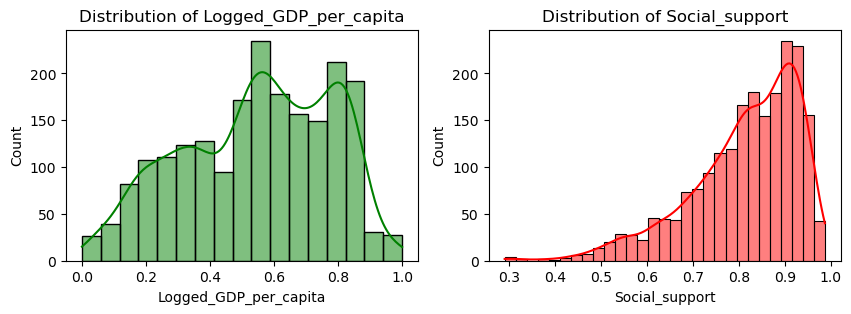

In [110]:
#Looking at the distributions of the quantitative variables to define how the missing values should be replaced - either with mean or median:

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df_all['Logged_GDP_per_capita'], kde = True, ax=axes[0], color = 'green')
axes[0].set_title('Distribution of Logged_GDP_per_capita');

sns.histplot(df_all['Social_support'], kde = True, ax=axes[1], color = 'red')
axes[1].set_title('Distribution of Social_support');

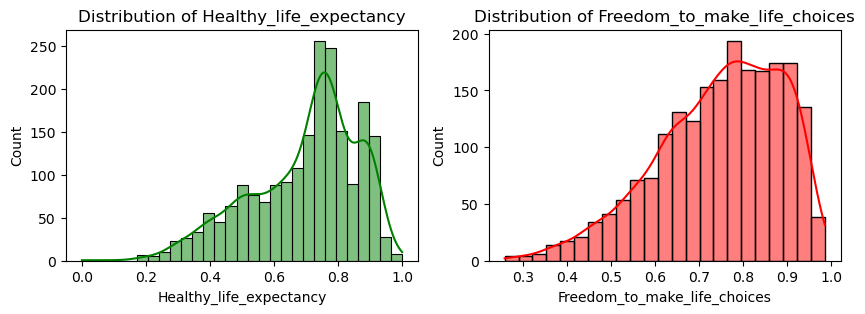

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df_all['Healthy_life_expectancy'], kde = True, ax=axes[0], color = 'green')
axes[0].set_title('Distribution of Healthy_life_expectancy');

sns.histplot(df_all['Freedom_to_make_life_choices'], kde = True, ax=axes[1], color = 'red')
axes[1].set_title('Distribution of Freedom_to_make_life_choices');


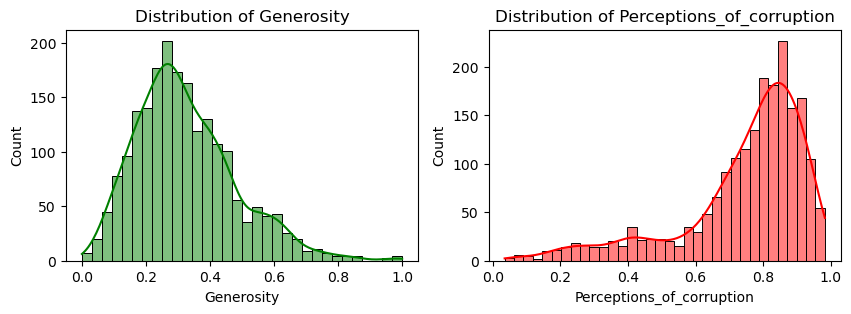

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df_all['Generosity'], kde = True, ax=axes[0], color = 'green')
axes[0].set_title('Distribution of Generosity');

sns.histplot(df_all['Perceptions_of_corruption'], kde = True, ax=axes[1], color = 'red')
axes[1].set_title('Distribution of Perceptions_of_corruption');

In [116]:
#We can see in all cases that distributions are not symetrical. For this reason, we choose to impute missing values with the median of each variable,
#which is more robust to skewed distributions and less sensitive to outliers than the mean.

#Replacing missing values of each variable with median:

# List of columns where missing values are to be replaced with median
columns_to_fill = ['Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices',
                   'Generosity', 'Perceptions_of_corruption']

# Replacing missing values with median in specified columns
for col in columns_to_fill:
    median_value = df_all[col].median()
    df_all[col].fillna(median_value, inplace=True)

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Regional_indicator            149 non-null    object 
 1   Country_name                  2098 non-null   object 
 2   year                          2098 non-null   float64
 3   Ladder_score                  2098 non-null   float64
 4   Logged_GDP_per_capita         2098 non-null   float64
 5   Social_support                2098 non-null   float64
 6   Healthy_life_expectancy       2098 non-null   float64
 7   Freedom_to_make_life_choices  2098 non-null   float64
 8   Generosity                    2098 non-null   float64
 9   Perceptions_of_corruption     2098 non-null   float64
dtypes: float64(8), object(2)
memory usage: 164.0+ KB


In [118]:
# Filling missing continent values based on the existing country-region pairs in the dataset
df_all['Regional_indicator'] = df_all.groupby('Country_name')['Regional_indicator'].transform(lambda x: x.ffill().bfill())
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Regional_indicator            2035 non-null   object 
 1   Country_name                  2098 non-null   object 
 2   year                          2098 non-null   float64
 3   Ladder_score                  2098 non-null   float64
 4   Logged_GDP_per_capita         2098 non-null   float64
 5   Social_support                2098 non-null   float64
 6   Healthy_life_expectancy       2098 non-null   float64
 7   Freedom_to_make_life_choices  2098 non-null   float64
 8   Generosity                    2098 non-null   float64
 9   Perceptions_of_corruption     2098 non-null   float64
dtypes: float64(8), object(2)
memory usage: 164.0+ KB


In [120]:
#We can see 63 values are still missing for the Regional indicator variable. To complete this, we have asked chatGPT to map the countries for which the
#corresponding continent is missing, to the most appropriate continent available in this dataframe. Based on this classification, a dictionnary
#was built to map countries to continent and fill in the missing continent modalities:

#Mapping dictionary based on provided classifications:

country_to_continent = {
    'Angola': 'Sub-Saharan Africa',
    'Belize': 'Latin America and Caribbean',
    'Bhutan': 'South Asia',
    'Central African Republic': 'Sub-Saharan Africa',
    'Congo (Kinshasa)': 'Sub-Saharan Africa',
    'Cuba': 'Latin America and Caribbean',
    'Djibouti': 'Sub-Saharan Africa',
    'Guyana': 'Latin America and Caribbean',
    'Oman': 'Middle East and North Africa',
    'Qatar': 'Middle East and North Africa',
    'Somalia': 'Sub-Saharan Africa',
    'Somaliland region': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Sudan': 'Sub-Saharan Africa',
    'Suriname': 'Latin America and Caribbean',
    'Syria': 'Middle East and North Africa',
    'Trinidad and Tobago': 'Latin America and Caribbean'
}

#Mapping the regional indicator to the corresponding country to fill in missing values

def fill_missing_continents(row):
    if pd.isnull(row['Regional_indicator']):
        return country_to_continent.get(row['Country_name'], None)
    return row['Regional_indicator']

# Apply the function to the DataFrame
df_all['Regional_indicator'] = df_all.apply(fill_missing_continents, axis=1)

# Print the updated DataFrame
df_all.head()

,Regional_indicator,Country_name,year,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,South Asia,Afghanistan,2019.0,2.375,0.211849,0.420,0.448661,0.394,0.219748,0.924
1,South Asia,Afghanistan,2021.0,2.523,0.211450,0.463,0.450737,0.382,0.225557,0.924
2,South Asia,Afghanistan,2017.0,2.662,0.211849,0.491,0.457589,0.427,0.207164,0.954
3,South Asia,Afghanistan,2018.0,2.694,0.210852,0.508,0.453125,0.374,0.233301,0.928
4,South Asia,Afghanistan,2014.0,3.131,0.216038,0.526,0.459375,0.509,0.424976,0.871


In [124]:
#Removing the decimal to the "year" variable and displaying infos on the final df_all dataset:

df_all['year'] = df_all['year'].astype(int)
display(df_all.head())
print(df_all.info())



,Regional_indicator,Country_name,year,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,South Asia,Afghanistan,2019,2.375,0.211849,0.420,0.448661,0.394,0.219748,0.924
1,South Asia,Afghanistan,2021,2.523,0.211450,0.463,0.450737,0.382,0.225557,0.924
2,South Asia,Afghanistan,2017,2.662,0.211849,0.491,0.457589,0.427,0.207164,0.954
3,South Asia,Afghanistan,2018,2.694,0.210852,0.508,0.453125,0.374,0.233301,0.928
4,South Asia,Afghanistan,2014,3.131,0.216038,0.526,0.459375,0.509,0.424976,0.871


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Regional_indicator            2098 non-null   object 
 1   Country_name                  2098 non-null   object 
 2   year                          2098 non-null   int32  
 3   Ladder_score                  2098 non-null   float64
 4   Logged_GDP_per_capita         2098 non-null   float64
 5   Social_support                2098 non-null   float64
 6   Healthy_life_expectancy       2098 non-null   float64
 7   Freedom_to_make_life_choices  2098 non-null   float64
 8   Generosity                    2098 non-null   float64
 9   Perceptions_of_corruption     2098 non-null   float64
dtypes: float64(7), int32(1), object(2)
memory usage: 155.8+ KB
None


In [126]:
#Showing the overall statistical description of df_all:
df_all.describe()

#The df_all dataset now appears to be clean and complete.

,year,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000
mean,2013.768827,5.471402,0.546496,0.812847,0.697003,0.746413,0.322237,0.748552
std,4.486449,1.112676,0.228277,0.117849,0.164639,0.139711,0.152977,0.181729
min,2005.000000,2.375000,0.000000,0.290000,0.000000,0.258000,0.000000,0.035000
25%,2010.000000,4.652250,0.368642,0.750000,0.595982,0.654250,0.218780,0.698000
50%,2014.000000,5.392000,0.563934,0.835000,0.736161,0.767000,0.298161,0.801000
75%,2018.000000,6.282500,0.739826,0.905000,0.808817,0.858000,0.405615,0.866000
max,2021.000000,8.019000,1.000000,0.987000,1.000000,0.985000,1.000000,0.983000


In [128]:
#Exporting the non encoded DataFrame to a CSV file, that will be used to produce data visualizations:
df_all.to_csv('df_all_notencoded.csv', index=False)

In [130]:
#As a last step, we are encoding the categorical variables Regional_indicator and Country_name? This is crucial
#to proceed with data modeling:
df_all['Regional_indicator'] = pd.factorize(df_all['Regional_indicator'])[0]
df_all['Country_name'] = pd.factorize(df_all['Country_name'])[0]

display(df_all.head())

,Regional_indicator,Country_name,year,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,0,0,2019,2.375,0.211849,0.420,0.448661,0.394,0.219748,0.924
1,0,0,2021,2.523,0.211450,0.463,0.450737,0.382,0.225557,0.924
2,0,0,2017,2.662,0.211849,0.491,0.457589,0.427,0.207164,0.954
3,0,0,2018,2.694,0.210852,0.508,0.453125,0.374,0.233301,0.928
4,0,0,2014,3.131,0.216038,0.526,0.459375,0.509,0.424976,0.871
